# Exploratory Data Analysis
evaluate the data of _employee in shift_ data with the help of Pandas lib.
 * period of time: 20200210-20200216

In the following cells we add column names and tell pandas the datatypes we now, mostly date/time types. If we don't pandas will make objects and the dataframe gets too big.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import time

In [2]:
set_size = 5000

for future use set the following options, otherwise snippets will only show so much as a default

In [3]:
pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 90)

In [4]:
# the headers or column names are not set, luckilly they are available
column_names = ["repository_timestamp",
                "op",
                "dms_timestamp",
                "id",
                "shift_id",
                "start_date_time",
                "end_date_time",
                "realized_start_date_time",
                "realized_end_date_time",
                "comm_to_employee_date_time",
                "comm_to_customer_date_time",
                "is_realiz_ok_by_customer",
                "decl_to_erp_system_date_time",
                "decl_to_erp_system_tag",
                "accept_by_employee_date_time",
                "accept_by_customer_date_time",
                "qual_fast_filter_id",
                "current_qual_percentage",
                "qual_percentage_increment",
                "realized_export_date_time",
                "planned_export_date_time",
                "last_change_date_of_planning",
                "pool_id",
                "customer_in_pool_id",
                "creation_date_time",
                "creation_with_type_id",
                "last_change_with_type_id",
                "deleted_date_time",
                "deleted_with_type_id",
                "comm_to_employee_with_type_id",
                "accept_by_emp_with_type_id",
                "comm_to_customer_with_type_id",
                "planned_export_with_type_id",
                "realized_date_time",
                "realized_with_type_id",
                "accept_by_cust_with_type_id",
                "decl_to_erp_with_type_id",
                "realized_export_with_type_id",
                "employee_id",
                "pool_employee_id",
                "is_first_time_by_customer",
                "event_id",
                "declared_start_date_time",
                "declared_end_date_time",
                "declared_event_id",
                "is_pauses_realized",
                "is_cost_categories_realized",
                "realized_event_id",
                "is_administrative_checked",
                "clocked_start_date_time",
                "clocked_end_date_time",
                "is_realization_doubtful",
                "is_to_evaluate_for_clock",
                "realized_by_employee_date_time",
                "confirmed_date_time",
                "confirmed_with_type_id",
                "viewable_for_emp_date_time",
                "viewable_for_emp_with_type_id",
                "called_up_date_time",
                "called_up_with_type_id",
                "reject_by_emp_date_time",
                "reject_by_emp_with_type_id",
                "reason_edit_emp_shift_type_id",
                "reason_edit_emp_shift_text",
                "changed_planned_hours_dt",
                "changed_event_date_time",
                "reason_deviant_realiz_type_id",
                "deviant_realization_start_dt",
                "deviant_realization_end_dt",
                "reason_deviant_realiz_text",
                "un_reject_by_planner_date_time",
                "current_call_up_id",
                "deviant_realization_event_id",
                "subst_group_id",
                "subst_date_time",
                "subst_with_type_id",
                "subst_prev_emp_in_shift_id",
                "subst_next_emp_in_shift_id",
                "is_on_call_employee",
                "placement_number",
                "is_on_call_source_type_id",
                "decl_examined_date_time",
                "batchid",
                "batch_ts"]
# df.columns = column_names

In [5]:
date_columns = ["repository_timestamp",
                "dms_timestamp",
                "start_date_time",
                "end_date_time",
                "realized_start_date_time",
                "realized_end_date_time",
                "comm_to_employee_date_time",
                "comm_to_customer_date_time",
                "decl_to_erp_system_date_time",
                "accept_by_employee_date_time",
                "accept_by_customer_date_time",
                "realized_export_date_time",
                "planned_export_date_time",
                "last_change_date_of_planning",
                "creation_date_time",
                "deleted_date_time",
                "realized_date_time",
                "declared_start_date_time",
                "declared_end_date_time",
                "realized_event_id",
                "clocked_start_date_time",
                "clocked_end_date_time",
                "realized_by_employee_date_time",
                "confirmed_date_time",
                "viewable_for_emp_date_time",
                "called_up_date_time",
                "reject_by_emp_date_time",
                "changed_event_date_time",
                "deviant_realization_start_dt",
                "deviant_realization_end_dt",
                "un_reject_by_planner_date_time",
                "subst_date_time",
                "decl_examined_date_time"]

In [6]:
other_dtypes = {'is_realiz_ok_by_customer':np.bool_,
                'is_first_time_by_customer':np.bool_,
                'is_pauses_realized':np.bool_,
                'is_cost_categories_realized':np.bool_,
                'is_administrative_checked':np.bool_,
                'is_realization_doubtful':np.bool_,
                'is_to_evaluate_for_clock':np.bool_,
                'is_on_call_employee':np.bool_,
                'is_on_call_source_type_id':np.bool_,
                'batchid':str}

## Loading the actual data (of interest) & Quick look
let's load the data, note that we can limit the number of rows with the attribute `nrows`. This is a more general way of loading things. It turns out we don't want all the columns, for the sake of speed, memory and overview we select a subset and only load that using `usecols`. Note that we do not use 

In [7]:
data_folder = Path("K:/some_data/repo_iplan_employee_in_shift_20200210-20200216")
# read only n-rows of the data, say 15
# nrows=15 set? otherwise you get a lot
df = pd.read_csv(data_folder / "repo_iplan_employee_in_shift_20200210-20200216.csv",
                 names=column_names, nrows=15, parse_dates=date_columns)

count the number of colums

In [8]:
print("number of columns : ", len(df.columns))
print("number of rows    : ", len(df.index))

number of columns :  84
number of rows    :  15


The file is already large, indicating there are a lot of rows, lets count them, (stick to one column)

_NOTE: THE FOLLOWING CELL TAKES OVER A MINUTE_

In [9]:
dfl = pd.read_csv(data_folder / "repo_iplan_employee_in_shift_20200210-20200216.csv",
                 names=column_names, usecols=[0], parse_dates=[0])
print("number of columns : ", len(dfl.columns))
print("number of rows    : ", len(dfl.index))

# meanwhile limit the setsize, just in case
if set_size > len(dfl.index): 
    set_size = len(dfl.index)



number of columns :  1
number of rows    :  248119


In [10]:
# # high level stats on this data
# # number of pools
# dflpools = dfl.groupby(['pool_id']).nunique()
# print("Number of unique pools   : ", len(dflpools.index))
# del dflpools

# dflshifts = dfl.groupby(['shift_id']).nunique()
# print("Number of unique shifts  : ", len(dflshifts.index))
# del dflshifts

# # number of deleted shifts
# dflshift = dfl.dropna(subset='deleted_date_time')
# print("Number of deleted shifts : ", len(dfl.index) - len(dflshift))

We now have learned that in two weeks 248119 shifts are planned, that is around 125.000 per week, or almost 21.000 per day. Not that loading this data took a looong time, processing with this data takes a long time, but gives good oversight.

The amount of data is way to big to view in one go, so lets view a snippet

In [11]:
df.head(5)

,repository_timestamp,op,dms_timestamp,id,shift_id,start_date_time,end_date_time,realized_start_date_time,realized_end_date_time,comm_to_employee_date_time,comm_to_customer_date_time,is_realiz_ok_by_customer,decl_to_erp_system_date_time,decl_to_erp_system_tag,accept_by_employee_date_time,accept_by_customer_date_time,qual_fast_filter_id,current_qual_percentage,qual_percentage_increment,realized_export_date_time,planned_export_date_time,last_change_date_of_planning,pool_id,customer_in_pool_id,creation_date_time,creation_with_type_id,last_change_with_type_id,deleted_date_time,deleted_with_type_id,comm_to_employee_with_type_id,accept_by_emp_with_type_id,comm_to_customer_with_type_id,planned_export_with_type_id,realized_date_time,realized_with_type_id,accept_by_cust_with_type_id,decl_to_erp_with_type_id,realized_export_with_type_id,employee_id,pool_employee_id,is_first_time_by_customer,event_id,declared_start_date_time,declared_end_date_time,declared_event_id,is_pauses_realized,is_cost_categories_realized,realized_event_id,is_administrative_checked,clocked_start_date_time,clocked_end_date_time,is_realization_doubtful,is_to_evaluate_for_clock,realized_by_employee_date_time,confirmed_date_time,confirmed_with_type_id,viewable_for_emp_date_time,viewable_for_emp_with_type_id,called_up_date_time,called_up_with_type_id,reject_by_emp_date_time,reject_by_emp_with_type_id,reason_edit_emp_shift_type_id,reason_edit_emp_shift_text,changed_planned_hours_dt,changed_event_date_time,reason_deviant_realiz_type_id,deviant_realization_start_dt,deviant_realization_end_dt,reason_deviant_realiz_text,un_reject_by_planner_date_time,current_call_up_id,deviant_realization_event_id,subst_group_id,subst_date_time,subst_with_type_id,subst_prev_emp_in_shift_id,subst_next_emp_in_shift_id,is_on_call_employee,placement_number,is_on_call_source_type_id,decl_examined_date_time,batchid,batch_ts
0,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.543285,126361814,131254489,2020-02-12 08:00:00,2020-02-12 17:00:00,NaT,NaT,NaT,2020-02-07 10:01:40,0,2020-02-19 20:25:01,NaN,2020-02-06 10:05:14,NaT,NaN,NaN,NaN,NaT,NaT,NaT,4550,12705,2020-02-04 16:43:30,1,10.0,NaT,NaN,NaN,10.0,1.0,NaN,NaT,NaN,NaN,8.0,NaN,823499,1136288,0,NaN,NaT,NaT,NaN,0,0,NaT,0,NaT,NaT,0,0,NaT,NaT,NaN,NaT,NaN,2020-02-04 16:44:18,1.0,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaN,NaT,1047474.0,NaN,302,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-19 20:25:01,5638c68a-1d30-4287-8c7e-d013253d7b04,2020-08-18 15:08:13.000000
1,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.724086,125706123,131073033,2020-02-13 15:15:00,2020-02-13 18:00:00,NaT,NaT,NaT,NaT,0,NaT,NaN,2020-02-13 14:09:04,NaT,NaN,NaN,NaN,NaT,2020-02-15 08:00:00,2020-02-13 10:31:29,5314,15206,2020-01-16 15:07:43,1,10.0,NaT,NaN,NaN,10.0,NaN,1.0,NaT,NaN,NaN,NaN,NaN,851774,1172843,0,NaN,NaT,NaT,NaN,0,0,NaT,0,NaT,NaT,0,0,NaT,NaT,NaN,NaT,NaN,2020-02-13 10:31:42,1.0,NaT,NaN,NaN,NaN,2020-02-13 10:31:29.000000,NaT,NaN,NaT,NaT,NaN,NaT,1277662.0,NaN,5068,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,5638c68a-1d30-4287-8c7e-d013253d7b04,2020-08-18 15:08:13.000000
2,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:47.933099,126370048,131959911,2020-02-14 07:00:00,2020-02-14 15:00:00,NaT,NaT,NaT,NaT,0,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,2020-02-06 09:52:09,11462,56585,2020-02-05 09:45:35,1,NaN,2020-02-06 09:52:09,1.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,861425,1185349,0,NaN,NaT,NaT,NaN,0,0,NaT,0,NaT,NaT,0,0,NaT,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaN,NaT,NaN,NaN,69649,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,5638c68a-1d30-4287-8c7e-d013253d7b04,2020-08-18 15:08:13.000000
3,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.585765,126362871,131940075,2020-02-10 08:32:00,2020-02-10 15:02:00,NaT,NaT,NaT,NaT,0,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,2020-02-06 07:24:07,8222,50627,2020-02-04 17:30:05,1,3.0,2020-02-06 07:24:07,1.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,883647,1214419,0,212.0,NaT,NaT,NaN,0,0,NaT,0,NaT,NaT,0,0,NaT,NaT,NaN,NaT,NaN,2020-02-04 17:30:07,1.0,NaT,NaN,NaN,NaN,NaN,2020-02-0

For now we take a subset of column we are interested in, you can always come back later and more if needed. Note that we do limit `nrows` in the end, less rows speeds up the graphical work.

In [12]:
cols_of_interest=["repository_timestamp",
                "op",
                "dms_timestamp",
                "id",
                "shift_id",
                "start_date_time",
                "end_date_time",
                "realized_start_date_time",
                "realized_end_date_time",
                "employee_id",
                "pool_employee_id",
                 "pool_id",
                 "confirmed_date_time", # level of interest doubtfull
                 "called_up_date_time",
                 "decl_to_erp_system_date_time",
                 "accept_by_employee_date_time",
                 "viewable_for_emp_date_time",
                 "deleted_date_time"]

In [13]:
# get specific for some calculations
dfwt = pd.read_csv(data_folder / "repo_iplan_employee_in_shift_20200210-20200216.csv", 
                       names=column_names, usecols=cols_of_interest, parse_dates=["repository_timestamp",
                "dms_timestamp",
                "start_date_time",
                "end_date_time",
                "realized_start_date_time",
                "realized_end_date_time",
                "decl_to_erp_system_date_time",
                "accept_by_employee_date_time",
                "viewable_for_emp_date_time",
                "deleted_date_time",
                "called_up_date_time"], nrows=set_size, skip_blank_lines=False)
# obsolete
# dfwt['StartTimeCount'] = pd.to_datetime(dfwt['start_date_time']).dt.strftime('%H:%M:%S')

In [14]:
dfwt.head(15)

,repository_timestamp,op,dms_timestamp,id,shift_id,start_date_time,end_date_time,realized_start_date_time,realized_end_date_time,decl_to_erp_system_date_time,accept_by_employee_date_time,pool_id,deleted_date_time,employee_id,pool_employee_id,confirmed_date_time,viewable_for_emp_date_time,called_up_date_time
0,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.543285,126361814,131254489,2020-02-12 08:00:00,2020-02-12 17:00:00,NaT,NaT,2020-02-19 20:25:01,2020-02-06 10:05:14,4550,NaT,823499,1136288,NaN,NaT,2020-02-04 16:44:18
1,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.724086,125706123,131073033,2020-02-13 15:15:00,2020-02-13 18:00:00,NaT,NaT,NaT,2020-02-13 14:09:04,5314,NaT,851774,1172843,NaN,NaT,2020-02-13 10:31:42
2,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:47.933099,126370048,131959911,2020-02-14 07:00:00,2020-02-14 15:00:00,NaT,NaT,NaT,NaT,11462,2020-02-06 09:52:09,861425,1185349,NaN,NaT,NaT
3,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.585765,126362871,131940075,2020-02-10 08:32:00,2020-02-10 15:02:00,NaT,NaT,NaT,NaT,8222,2020-02-06 07:24:07,883647,1214419,NaN,NaT,2020-02-04 17:30:07
4,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:46.883311,126373902,131077657,2020-02-10 11:30:00,2020-02-10 14:30:00,NaT,NaT,NaT,NaT,2550,2020-02-06 12:03:16,386860,741826,NaN,NaT,2020-02-05 10:16:30
5,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:46.327787,126292562,131521169,2020-02-13 06:30:00,2020-02-13 15:00:00,NaT,NaT,NaT,NaT,19543,2020-02-05 10:48:41,868173,1193801,NaN,NaT,NaT
6,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.550083,126364066,131953810,2020-02-10 06:00:00,2020-02-10 10:00:00,2020-02-10 06:00:00,2020-02-10 10:00:00,2020-02-14 12:55:07,2020-02-05 07:55:58,8222,NaT,854015,1175586,NaN,NaT,2020-02-05 07:44:24
7,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.536121,126362278,131790645,2020-02-16 13:00:00,2020-02-16 19:00:00,2020-02-16 13:00:00,2020-02-16 21:00:00,2020-02-17 10:42:28,2020-02-16 11:51:33,12102,NaT,842914,1161617,NaN,2020-02-05 11:22:08,2020-02-16 11:40:50
8,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:47.967405,126372619,131931288,2020-02-14 09:00:00,2020-02-14 16:00:00,NaT,NaT,NaT,NaT,4550,NaT,887882,1220127,NaN,NaT,2020-02-05 15:48:47
9,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:48.019093,126363649,128817253,2020-02-12 01:00:00,2020-02-12 07:15:00,2020-02-12 01:00:00,2020-02-12 07:05:00,NaT,2020-02-06 14:15:56,168,NaT,839825,1224931,NaN,2020-02-04 21:00:07,2020-02-06 10:31:01


## Shifts, Employees and Pools
All very connected, but for having an idea how is this organised, what is the scale?
Count shifts, uniques shifts and say something about the duplication numbers.
Count Employees.

In [15]:
# check is all shifts have an idea
print("shifts with no id : ", dfwt['shift_id'].isna().sum())

# group by shift id - how many unique shifts are there
# dfwt["ShiftID_Copy"] = dfwt['shift_id']
# dfwt[dfwt.duplicated(['shift_id'], keep=False)]
dfun = dfwt.groupby(['shift_id']).nunique()
print("unique shifts : ", len(dfun.index))

# you can also check for duplicates, first of set duplicates is set to False, following duplicates are marked True
print("Duplicates:\n", dfwt.duplicated(subset='shift_id', keep='first').value_counts())

shifts with no id :  0
unique shifts :  3975
Duplicates:
 False    3975
True     1025
dtype: int64


In [16]:
# check if all shifts are assigned to an employee
print("number of missing Employee IDs: ", dfwt['employee_id'].isna().sum())

dfun = dfwt.groupby(['employee_id']).nunique()
print("unique employees : ", len(dfun.index))

number of missing Employee IDs:  0
unique employees :  3902


In [17]:
# get some info about pools
print("number of missing pool ids: ", dfwt['employee_id'].isna().sum())


dfun = dfwt.groupby(['pool_id']).nunique()
print("unique pools : ", len(dfun.index))
dfun

number of missing pool ids:  0
unique pools :  322


,repository_timestamp,op,dms_timestamp,id,shift_id,start_date_time,end_date_time,realized_start_date_time,realized_end_date_time,decl_to_erp_system_date_time,accept_by_employee_date_time,pool_id,deleted_date_time,employee_id,pool_employee_id,confirmed_date_time,viewable_for_emp_date_time,called_up_date_time
pool_id,,,,,,,,,,,,,,,,,,
24,1,1,60,60,29,20,19,17,18,25,35,1,19,39,39,0,1,4
29,1,1,3,3,3,3,3,0,0,0,2,1,0,1,1,0,0,1
30,1,1,5,5,4,3,3,0,0,2,2,1,1,5,5,0,1,3
32,1,1,1,1,1,1,1,0,0,0,1,1,0,1,1,0,1,1
42,1,1,119,119,66,23,30,20,16,6,32,1,66,78,78,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20705,1,1,2,2,2,2,2,0,0,0,1,1,0,2,2,0,0,1
20723,1,1,6,6,6,6,6,5,4,4,5,1,0,5,5,0,0,2
20783,1,1,3,3,3,3,3,0,0,2,1,1,1,2,2,0,0,1


lets dive a little more in a pool, let's take pool 24

In [18]:
# make a df containing only pool 24
dfp24 = dfwt[(dfwt.pool_id) == 24 ]
dfp24.head(15)

,repository_timestamp,op,dms_timestamp,id,shift_id,start_date_time,end_date_time,realized_start_date_time,realized_end_date_time,decl_to_erp_system_date_time,accept_by_employee_date_time,pool_id,deleted_date_time,employee_id,pool_employee_id,confirmed_date_time,viewable_for_emp_date_time,called_up_date_time
18,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:47.933435,126370228,130674136,2020-02-12 13:30:00,2020-02-12 22:00:00,2020-02-12 13:30:00,2020-02-12 22:00:00,2020-02-13 06:32:17,2020-02-06 12:21:17,24,NaT,794214,1103483,NaN,NaT,2020-02-05 16:56:00
91,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:56.463206,126374681,130727194,2020-02-10 07:00:00,2020-02-10 13:30:00,2020-02-10 07:00:00,2020-02-10 13:30:00,2020-02-10 19:16:19,2020-02-05 19:34:00,24,NaT,869525,1195526,NaN,NaT,2020-02-05 16:56:00
123,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:46.356982,126371735,130727201,2020-02-10 07:00:00,2020-02-10 15:30:00,NaT,NaT,NaT,NaT,24,2020-02-05 10:22:07,874746,1202680,NaN,NaT,NaT
190,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:56.463290,126374684,130727194,2020-02-10 07:00:00,2020-02-10 13:30:00,2020-02-10 07:00:00,2020-02-10 13:30:00,2020-02-10 19:16:19,2020-02-06 01:46:49,24,NaT,858992,1182107,NaN,NaT,2020-02-05 16:56:00
210,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:50.284271,126371459,130727202,2020-02-11 07:00:00,2020-02-11 15:30:00,2020-02-11 07:00:00,2020-02-11 15:30:00,2020-02-11 18:58:26,2020-02-05 17:44:47,24,NaT,841789,1162163,NaN,NaT,2020-02-05 16:56:00
217,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:59.032297,126372141,130727204,2020-02-13 07:00:00,2020-02-13 15:30:00,2020-02-13 07:00:00,2020-02-13 15:30:00,2020-02-13 17:39:02,2020-02-05 17:15:03,24,NaT,516881,733766,NaN,NaT,2020-02-05 16:56:00
298,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:56.444534,126371610,130727204,2020-02-13 07:00:00,2020-02-13 15:30:00,NaT,NaT,NaT,NaT,24,NaT,683808,1104904,NaN,NaT,2020-02-10 16:54:59
347,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:48.045378,126370579,130714479,2020-02-14 07:00:00,2020-02-14 15:30:00,NaT,NaT,NaT,2020-02-05 17:33:26,24,NaT,850892,1171739,NaN,NaT,2020-02-10 16:54:59
397,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:48.030441,126370255,130674165,2020-02-13 07:00:00,2020-02-13 15:30:00,2020-02-13 07:00:00,2020-02-13 15:30:00,2020-02-13 17:39:12,2020-02-05 16:58:15,24,NaT,704061,979415,NaN,NaT,2020-02-05 16:56:00
410,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:48.037970,126370094,130674141,2020-02-10 12:30:00,2020-02-10 21:00:00,2020-02-10 12:30:00,2020-02-10 21:00:00,2020-02-11 06:32:49,2020-02-05 19:03:59,24,NaT,793002,1097099,NaN,NaT,2020-02-05 16:56:00


In [19]:
# lets take a pool that has around 14 - 21 shifts: 2 a 3 per day
dfun['dms_timestamp'].sort_values()

dfun2 = dfun[dfun['dms_timestamp'].between(14, 21)]
dfun2.head(5)

,repository_timestamp,op,dms_timestamp,id,shift_id,start_date_time,end_date_time,realized_start_date_time,realized_end_date_time,decl_to_erp_system_date_time,accept_by_employee_date_time,pool_id,deleted_date_time,employee_id,pool_employee_id,confirmed_date_time,viewable_for_emp_date_time,called_up_date_time
pool_id,,,,,,,,,,,,,,,,,,
229,1,1,17,17,15,9,9,6,7,8,8,1,4,15,15,0,14,7
347,1,1,19,19,9,9,9,6,7,13,13,1,6,16,16,0,0,12
351,1,1,21,21,20,17,16,14,14,2,1,1,4,20,20,0,0,1
2466,1,1,20,20,15,13,13,8,8,7,11,1,3,17,17,0,9,2
3746,1,1,14,14,8,8,7,5,5,8,13,1,1,13,13,0,1,7


In [20]:
# make a df containing only pool 229
dfp229 = dfwt[(dfwt.pool_id) == 229 ]
print(len(dfp229.index)) # nr shifts in this pool

17


The above looks interesting. What means no `realized_start_date_time`? In the following cells we will zoom in on pool 229 (because it is not too big neither too small) and investigate the entire 84 columns:

In [21]:
dfp229 = dfp229.sort_values('start_date_time')

In [22]:
dfp229all = pd.read_csv(data_folder / "repo_iplan_employee_in_shift_20200210-20200216.csv",
                 names=column_names, nrows=5000, parse_dates=date_columns)
# only load the indexes containing 229 info
pool229ids = np.transpose(list(dfp229.index))
dfp229all = dfp229all.iloc[pool229ids,:]

In [23]:
sel229 = ["shift_id",
          "start_date_time", 
          "end_date_time","realized_start_date_time",
          "realized_end_date_time",
          "decl_to_erp_system_date_time",
          "accept_by_employee_date_time",
          "employee_id",
          "viewable_for_emp_date_time",
          "called_up_date_time",
          "deleted_date_time"]
dfp229sel = dfp229all[sel229]
# if you want to inspect a certain shift
# dfp229sel[(dfp229sel.shift_id) == 130309679 ]
# or just take some rows
len229 = len(dfp229sel.index)
dfp229sel.head(len229)

,shift_id,start_date_time,end_date_time,realized_start_date_time,realized_end_date_time,decl_to_erp_system_date_time,accept_by_employee_date_time,employee_id,viewable_for_emp_date_time,called_up_date_time,deleted_date_time
3064,130026238,2020-02-09 08:30:00,2020-02-09 18:00:00,NaT,NaT,NaT,2020-02-06 10:40:55,891720,NaT,2020-02-07 12:10:17,NaT
2602,130026238,2020-02-09 08:30:00,2020-02-09 18:00:00,NaT,NaT,NaT,NaT,861888,2019-12-16 00:48:06,NaT,2020-01-06 11:27:30
3185,130024026,2020-02-09 08:30:00,2020-02-09 18:00:00,NaT,NaT,NaT,NaT,877552,2019-12-16 00:48:02,NaT,2020-01-13 18:36:10
3823,130309678,2020-02-10 15:10:00,2020-02-10 22:55:00,NaT,NaT,NaT,NaT,885051,2019-12-31 08:46:36,NaT,2020-01-06 10:39:38
3943,130309735,2020-02-11 07:10:00,2020-02-11 15:10:00,2020-02-11 07:10:00,2020-02-11 15:10:00,2020-02-11 15:12:51,NaT,891733,NaT,2020-02-10 12:36:31,NaT
2999,130290457,2020-02-11 07:10:00,2020-02-11 15:10:00,2020-02-11 07:10:00,2020-02-11 15:10:00,2020-02-11 15:12:52,2020-02-06 13:30:16,284132,2019-12-23 00:53:20,2020-02-06 13:28:16,NaT
3615,130309679,2020-02-11 15:10:00,2020-02-11 22:55:00,NaT,NaT,NaT,NaT,666043,2019-12-23 00:53:33,NaT,NaT
4063,130309736,2020-02-12 07:10:00,2020-02-12 15:10:00,NaT,NaT,NaT,NaT,891722,2020-02-05 09:29:12,2020-02-11 11:29:04,NaT
4821,130290458,2020-02-12 07:10:00,2020-02-12 15:10:00,2020-02-12 07:10:00,2020-02-12 15:10:00,2020-02-12 15:10:45,2020-02-07 11:28:06,209632,2019-12-23 00:53:10,2020-02-06 13:28:16,NaT
4902,130309680,2020-02-12 15:10:00,2020-02-12 22:55:00,2020-02-12 15:10:00,2020-02-12 22:55:00,2020-02-13 08:30:26,2020-02-06 13:40:36,766845,2019-12-23 00:53:24,2020-02-06 13:28:16,NaT


In [24]:
dfp229all.iloc[4:8,:].head()

,repository_timestamp,op,dms_timestamp,id,shift_id,start_date_time,end_date_time,realized_start_date_time,realized_end_date_time,comm_to_employee_date_time,comm_to_customer_date_time,is_realiz_ok_by_customer,decl_to_erp_system_date_time,decl_to_erp_system_tag,accept_by_employee_date_time,accept_by_customer_date_time,qual_fast_filter_id,current_qual_percentage,qual_percentage_increment,realized_export_date_time,planned_export_date_time,last_change_date_of_planning,pool_id,customer_in_pool_id,creation_date_time,creation_with_type_id,last_change_with_type_id,deleted_date_time,deleted_with_type_id,comm_to_employee_with_type_id,accept_by_emp_with_type_id,comm_to_customer_with_type_id,planned_export_with_type_id,realized_date_time,realized_with_type_id,accept_by_cust_with_type_id,decl_to_erp_with_type_id,realized_export_with_type_id,employee_id,pool_employee_id,is_first_time_by_customer,event_id,declared_start_date_time,declared_end_date_time,declared_event_id,is_pauses_realized,is_cost_categories_realized,realized_event_id,is_administrative_checked,clocked_start_date_time,clocked_end_date_time,is_realization_doubtful,is_to_evaluate_for_clock,realized_by_employee_date_time,confirmed_date_time,confirmed_with_type_id,viewable_for_emp_date_time,viewable_for_emp_with_type_id,called_up_date_time,called_up_with_type_id,reject_by_emp_date_time,reject_by_emp_with_type_id,reason_edit_emp_shift_type_id,reason_edit_emp_shift_text,changed_planned_hours_dt,changed_event_date_time,reason_deviant_realiz_type_id,deviant_realization_start_dt,deviant_realization_end_dt,reason_deviant_realiz_text,un_reject_by_planner_date_time,current_call_up_id,deviant_realization_event_id,subst_group_id,subst_date_time,subst_with_type_id,subst_prev_emp_in_shift_id,subst_next_emp_in_shift_id,is_on_call_employee,placement_number,is_on_call_source_type_id,decl_examined_date_time,batchid,batch_ts
3943,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:56.473142,126370721,130309735,2020-02-11 07:10:00,2020-02-11 15:10:00,2020-02-11 07:10:00,2020-02-11 15:10:00,NaT,NaT,1,2020-02-11 15:12:51,NaN,NaT,2020-02-11 15:12:51,NaN,NaN,NaN,NaT,NaT,2020-02-10 12:35:37,229,310,2020-02-05 09:54:19,1,1.0,NaT,NaN,NaN,NaN,NaN,NaN,2020-02-11 15:10:00,9.0,2.0,2.0,NaN,891733,1224975,0,NaN,2020-02-11 07:10:00,2020-02-11 15:10:00,NaN,1,1,NaN,0,2020-02-11 07:05:00,2020-02-11 15:10:00,0,0,NaT,NaT,NaN,NaT,NaN,2020-02-10 12:36:31,1.0,NaT,NaN,NaN,NaN,NaN,2020-02-10 12:35:37,NaN,NaT,NaT,NaN,NaT,1115199.0,NaN,311712,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-11 15:12:51,5638c68a-1d30-4287-8c7e-d013253d7b04,2020-08-18 15:08:13.000000
2999,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:49.727877,124870376,130290457,2020-02-11 07:10:00,2020-02-11 15:10:00,2020-02-11 07:10:00,2020-02-11 15:10:00,NaT,NaT,1,2020-02-11 15:12:52,NaN,2020-02-06 13:30:16,2020-02-11 15:12:51,NaN,NaN,NaN,NaT,NaT,NaT,229,310,2019-12-23 00:53:20,4,10.0,NaT,NaN,NaN,10.0,NaN,NaN,2020-02-11 15:10:00,9.0,2.0,2.0,NaN,284132,387268,0,NaN,2020-02-11 07:10:00,2020-02-11 15:10:00,NaN,1,1,NaN,0,2020-02-11 07:00:00,2020-02-11 15:10:00,0,0,NaT,NaT,NaN,2019-12-23 00:53:20,4.0,2020-02-06 13:28:16,1.0,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaN,NaT,1114828.0,NaN,28032972,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-11 15:12:52,5638c68a-1d30-4287-8c7e-d013253d7b04,2020-08-18 15:08:13.000000
3615,2020-08-18 20:22:52.059095,I,2020-08-18 14:58:19.412232,124870586,130309679,2020-02-11 15:10:00,2020-02-11 22:55:00,NaT,NaT,NaT,NaT,0,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaT,229,310,2019-12-23 00:53:33,4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,666043,929961,0,7.0,NaT,NaT,NaN,0,0,NaN,0,NaT,NaT,0,0,NaT,NaT,NaN,2019-12-23 00:53:33,4.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,2020-01-20 12:49:53,NaN,NaT,NaT,NaN,NaT,NaN,NaN,21072787,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,836d0932-4112-4da5-8bfd-41524bbe3955,2020-08-18 15:08:13.000000
4063,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:59.004458,126368624,130309736,2020-02-12 07:10:00,2020-02-12 15:10:00,NaT,NaT,NaT,NaT,0,NaT,NaN,NaT,NaT,NaN,NaN,Na

## Pool evaluation
I worked out this in a more nicely formated table (in this google doc [https://docs.google.com/spreadsheets/d/1R7CrE_quP0pSiJH8gbbNLhdeK7soBsYwxZ0-lYY1u-c/edit#gid=1111727723])

### Replanning
A problem of the planners might be that they have to replan a lot. It might be interesting if there are features that could point out wether a shift 'will give planning trouble'.

### Observations
In this mini example of out of 17 planned shifts, 4 are deleted, 8 are realized. A number of shifts are accepted, but have no realisation. Let's dive in these attributes a bit more:


In [25]:
dfwt['decl_to_erp_system_date_time'].count()

1788

In [26]:
# lets reuse the selection list and apply it to the selection of 5000
for h in sel229:
    sumna = dfwt[h].isna().sum()
    print("Sum of isna in " + h, " : ", sumna)

Sum of isna in shift_id  :  0
Sum of isna in start_date_time  :  0
Sum of isna in end_date_time  :  0
Sum of isna in realized_start_date_time  :  3505
Sum of isna in realized_end_date_time  :  3510
Sum of isna in decl_to_erp_system_date_time  :  3212
Sum of isna in accept_by_employee_date_time  :  2104
Sum of isna in employee_id  :  0
Sum of isna in viewable_for_emp_date_time  :  3700
Sum of isna in called_up_date_time  :  1165
Sum of isna in deleted_date_time  :  3577


Note that shift_id and start/end date are never missing (in any of the 5000 cases). Furthermore we note following
 - not all shifts are realized, (3505), this might relate to:
   - 5000-3577=1423 shifts have a `deleted_date_time ` i.e. they are deleted
   - neither calling or accepting did not lead to a realised shift
 - (as for now) only 
 
 We note we have some statistics on called employees, and also on accepted shifts, but did those end up in realized shifts?

In [27]:
# check called up shifts
dfrelcal = dfwt.dropna(subset=['called_up_date_time'])
ncalup = len(dfrelcal.index)
nrcalup = dfrelcal['realized_start_date_time'].isna().sum()

# check accepted but not called
dfcalled = dfwt['called_up_date_time'].isna()
# dfnocall = dfwt.isnull(subset=['called_up_date_time'])

dfaccepted = dfwt.dropna(subset=['accept_by_employee_date_time'])
dfnocallaccepted = dfaccepted.isna()
nrnocallaccepted = dfnocallaccepted.called_up_date_time.value_counts()
nrnocallaccepted = nrnocallaccepted[0]


# check called up and accepted
calupaccept = dfrelcal.dropna(subset=['accept_by_employee_date_time'])
nrcalupaccept = calupaccept['realized_start_date_time'].isna().sum

totalshifts = len(dfwt.index)
print(ncalup, " called up shifts, out of which ", nrcalup, " not realised. Total shifts: ", totalshifts)
print(nrcalupaccept, " called and accepted shifts, however ", nrcalupaccept, " not realised")

# check accepted shifts
dfrelacc =dfwt.dropna(subset=['accept_by_employee_date_time'])


3835  called up shifts, out of which  2384  not realised. Total shifts:  5000
<bound method Series.sum of 0        True
1        True
6       False
7       False
9       False
        ...  
4990    False
4991    False
4997    False
4998    False
4999    False
Name: realized_start_date_time, Length: 2895, dtype: bool>  called and accepted shifts, however  <bound method Series.sum of 0        True
1        True
6       False
7       False
9       False
        ...  
4990    False
4991    False
4997    False
4998    False
4999    False
Name: realized_start_date_time, Length: 2895, dtype: bool>  not realised


In [28]:
# how many shift are there?
nrShifts = len(dfwt.index)
print("Total number of shifts in examined set: ", nrShifts)

# how many viewable shifts are there?
nrViewableShifts = dfwt.dropna(subset=['viewable_for_emp_date_time']) # there is also the id, would be interesting
nrViewableShifts = len(nrViewableShifts.index)
print("Viewable for employee shifts: ", nrViewableShifts)

# how many viewable shifts are realized / not realized (R or NR)
nrViewableShiftsR = dfwt.dropna(subset=['viewable_for_emp_date_time', 'realized_start_date_time']).__len__()
print("Viewable shifts that have been realized: ", nrViewableShiftsR)

nrViewableShiftsNR = dfwt.dropna(subset=['viewable_for_emp_date_time'])
nrViewableShiftsNR = nrViewableShiftsNR.realized_start_date_time.isna().value_counts() # gives False/ True series
print("Viewable shifts that have not been realized: ", nrViewableShiftsNR[nrViewableShiftsNR.index==True].item())

# how many viewable shifts are (not) accepted
dfViewableAcceptedShift = dfwt.dropna(subset=['viewable_for_emp_date_time', 'accept_by_employee_date_time']) # accept has value
nrViewableAcceptedShift = len(dfViewableAcceptedShift.index)
print("Viewable shifts that have been accepted: ", nrViewableAcceptedShift)

dfViewableNAcceptedShift = dfwt.dropna(subset=['viewable_for_emp_date_time'])
nrViewableNAcceptedShift = dfViewableNAcceptedShift.accept_by_employee_date_time.isna().value_counts()
print("Viewable shifts that have not been accepted: ", nrViewableNAcceptedShift[nrViewableNAcceptedShift.index==True].item())

# how many not viewable shifts - called afterwards
# TODO isnull() takes 1 positional argument but 2 were given

# dfNViewable = dfwt.isnull('viewable_for_emp_date_time')
# dfCalledShifts = dfNViewable.dropna(subset=['called_up_date_time'])
# print("Number of not viewable shift that have been called: ", len(dfCalledShifts.index))
# of which have been accepted (you could say success rate)
# sCalledShiftsAceptYN = dfCalledShifts.realized_start_date_time.isna().value_count()
# print(" that resulted in a realised shift  : ", sCalledShiftsAceptYN[sCalledShiftsAceptYN.index==False].item())
# print(" that resulted in a unrealised shift: ", sCalledShiftsAceptYN[sCalledShiftsAceptYN.index==True].item())


Total number of shifts in examined set:  5000
Viewable for employee shifts:  1300
Viewable shifts that have been realized:  380
Viewable shifts that have not been realized:  920
Viewable shifts that have been accepted:  740
Viewable shifts that have not been accepted:  560


In [29]:
nrViewableShiftsNR[nrViewableShiftsNR.index==True].item()

920

## Shifts 
The data gives us all the shifts in a certain period of time including all the attributes. Let's see wat some basic statistics will tell us here.

In [30]:
dfwt.head(5)

,repository_timestamp,op,dms_timestamp,id,shift_id,start_date_time,end_date_time,realized_start_date_time,realized_end_date_time,decl_to_erp_system_date_time,accept_by_employee_date_time,pool_id,deleted_date_time,employee_id,pool_employee_id,confirmed_date_time,viewable_for_emp_date_time,called_up_date_time
0,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.543285,126361814,131254489,2020-02-12 08:00:00,2020-02-12 17:00:00,NaT,NaT,2020-02-19 20:25:01,2020-02-06 10:05:14,4550,NaT,823499,1136288,NaN,NaT,2020-02-04 16:44:18
1,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.724086,125706123,131073033,2020-02-13 15:15:00,2020-02-13 18:00:00,NaT,NaT,NaT,2020-02-13 14:09:04,5314,NaT,851774,1172843,NaN,NaT,2020-02-13 10:31:42
2,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:47.933099,126370048,131959911,2020-02-14 07:00:00,2020-02-14 15:00:00,NaT,NaT,NaT,NaT,11462,2020-02-06 09:52:09,861425,1185349,NaN,NaT,NaT
3,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.585765,126362871,131940075,2020-02-10 08:32:00,2020-02-10 15:02:00,NaT,NaT,NaT,NaT,8222,2020-02-06 07:24:07,883647,1214419,NaN,NaT,2020-02-04 17:30:07
4,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:46.883311,126373902,131077657,2020-02-10 11:30:00,2020-02-10 14:30:00,NaT,NaT,NaT,NaT,2550,2020-02-06 12:03:16,386860,741826,NaN,NaT,2020-02-05 10:16:30


Already we see that there is sparsity in the data: not all cells have been filled in. Lets see what a basic statistic will indicate:

In [31]:
# percentile list 
perc =[.20, .40, .60, .80] 

# list of dtypes to include 
include =['int', 'float64', 'datetime64'] 

# calling describe method 
desc = dfwt.describe(percentiles = perc, include = include)

# display
desc

,repository_timestamp,dms_timestamp,start_date_time,end_date_time,realized_start_date_time,realized_end_date_time,decl_to_erp_system_date_time,accept_by_employee_date_time,deleted_date_time,viewable_for_emp_date_time,called_up_date_time
count,5000,5000,5000,5000,1495,1490,1788,2896,1423,1300,3835
unique,1,5000,532,595,425,489,1412,2579,1354,577,1301
top,2020-08-18 20:22:52.059095,2020-08-18 14:55:40.620006,2020-02-13 07:00:00,2020-02-11 15:00:00,2020-02-13 07:00:00,2020-02-13 15:00:00,2020-02-14 09:11:49,2020-02-06 15:51:06,2020-02-06 10:33:04,2020-02-06 12:06:07,2020-02-05 15:48:47
freq,5000,1,120,89,40,22,7,5,4,90,192
first,2020-08-18 20:22:52.059095,2020-08-18 14:43:45.531698,2020-02-09 01:30:00,2020-02-09 05:01:00,2020-02-09 05:45:00,2020-02-09 13:45:00,2020-02-09 15:00:18,2019-12-15 23:18:56,2019-04-09 15:26:11,2019-11-26 19:15:08,2019-12-10 13:36:05
last,2020-08-18 20:22:52.059095,2020-08-18 14:59:00.402786,2020-02-16 17:00:00,2020-02-16 23:59:00,2020-02-16 16:30:00,2020-02-16 23:30:00,2020-03-12 00:42:13,2020-02-16 11:51:33,2020-02-19 12:04:07,2020-02-14 15:15:32,2020-02-16 11:40:50


## Custom shift attributes
This description confirms the sparsity. Of the loaded 5000 columns we found that start and end times have been filled in but the realized times are missing in 5000-1495=3505 shifts, over 2/3rd. Furthermore we count almost 600 unique start and end times. 
Combining/processing columns could give more insight (don't forget there are 84 columns to choose from, they are at the beginning of this notebook). We could apply the following:
 - bin times based on the *start_date_time*
 - calculate a planned shift duration (delta between *start_date_time* and *end_date_time*)
 - calculate a realised shift duration (delta between *start_date_time* and *end_date_time*)
 - caluclate a deviation in start and end time e.g. delta in start time; end time; duration
 - more ...?


let's start with binning the data, here `groupby` is usefull

In [32]:
# make df that bins the times (panda calls this grouping, hence `groupby` )
# since we group for *start_date_time* we copy this info for later use
dfwt['StartDTCopy']= dfwt['start_date_time']

# do the grouping
# make df that counts per hour

# use generic counter
# for minutes use e.g. freq='15T'
# for hours use e.g. freq='2H'
dfg = dfwt.groupby(pd.Grouper(key='start_date_time', freq='1H')).count()

# alternative code:
# dfg = dfwt.groupby(dfwt['start_date_time'].dt.hour).size()

Lets inspect the result, in the most left label you see the grouping effect, as expected most shifts start during 0600-0700 (first row is 0000-0100). You can play around with the minute option to have a more detailed overview, this will give also better visualisations)

In [33]:
dfg.head(10)

,repository_timestamp,op,dms_timestamp,id,shift_id,end_date_time,realized_start_date_time,realized_end_date_time,decl_to_erp_system_date_time,accept_by_employee_date_time,pool_id,deleted_date_time,employee_id,pool_employee_id,confirmed_date_time,viewable_for_emp_date_time,called_up_date_time,StartDTCopy
start_date_time,,,,,,,,,,,,,,,,,,
2020-02-09 01:00:00,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1
2020-02-09 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-09 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-09 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-09 05:00:00,4,4,4,4,4,4,1,1,1,2,4,0,4,4,0,3,2,4
2020-02-09 06:00:00,14,14,14,14,14,14,1,1,3,7,14,4,14,14,0,5,10,14
2020-02-09 07:00:00,34,34,34,34,34,34,6,6,11,18,34,8,34,34,1,15,28,34
2020-02-09 08:00:00,6,6,6,6,6,6,1,1,2,4,6,2,6,6,0,2,4,6
2020-02-09 09:00:00,11,11,11,11,11,11,5,5,4,6,11,4,11,11,0,0,8,11


### Cumulative shifts per period of time
lets make a plot using Seaborn, and have the resolution of the groups set to 30 min, you can safely use *repository_timestamp* as a counter (on the y-axis) since it has no Nulls.

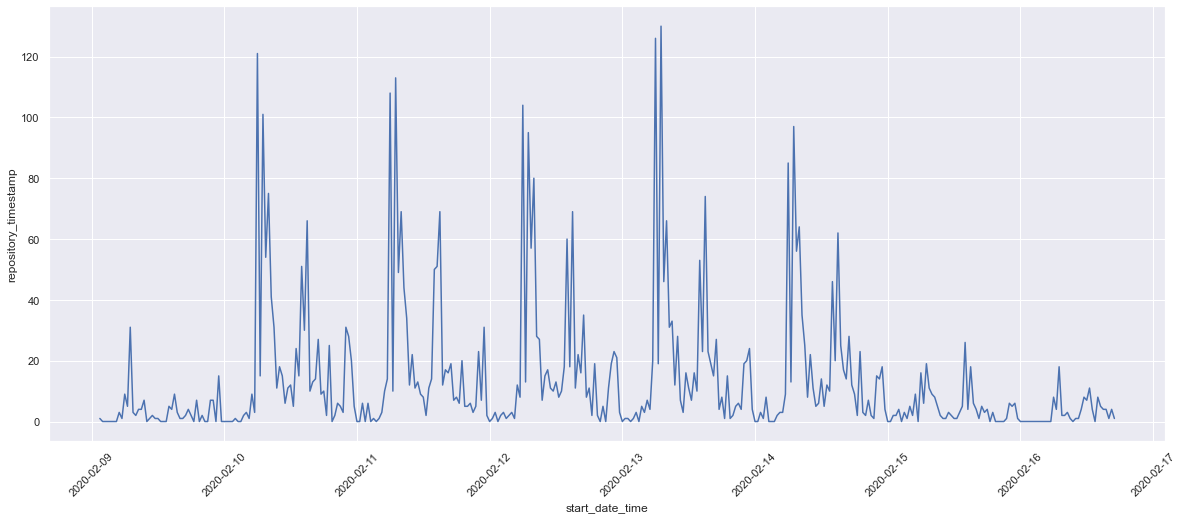

In [34]:
# see if we can make a plot with lines
# note: we use 
dfg2 = dfwt.groupby(pd.Grouper(key='start_date_time', freq='30T')).count()
sns.set_theme(style="darkgrid")
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set(rc={'figure.figsize':(20.0,8)})
start_plot = sns.lineplot(x='start_date_time', y='repository_timestamp', data=dfg2)
piet = plt.setp(start_plot.get_xticklabels(), rotation=45)


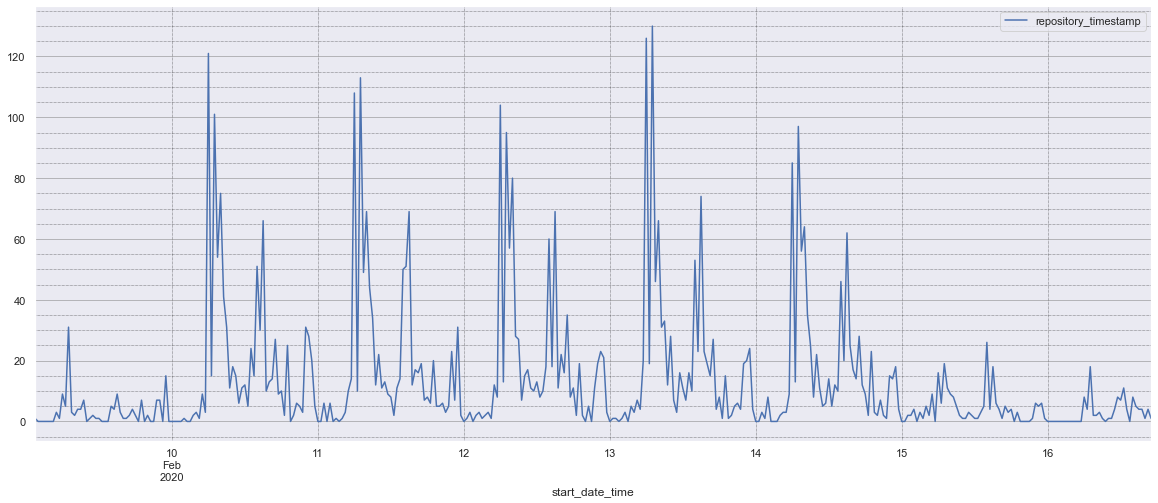

In [35]:
# use pandas build in plot
fig, ax = plt.subplots()
# swithc on minor TICKS
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

dfg2.plot(kind='line', y='repository_timestamp', ax=ax)

As you might have guessed, 10 feb 2020 was a Monday!

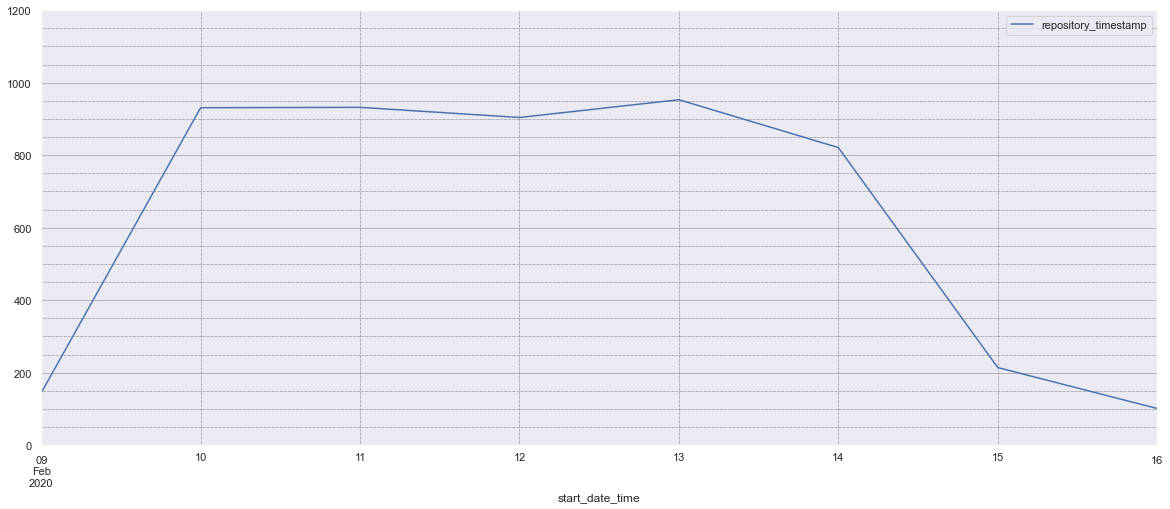

In [36]:
# zoom out to daily basis
dfg2 = dfwt.groupby(pd.Grouper(key='start_date_time', freq='1D')).count()
# use pandas build in plot again
fig, ax = plt.subplots()
# swithc on minor TICKS
ax.minorticks_on()
# Customize the major grid
ax.set_ylim([0,1200])
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

dfg2.plot(kind='line', y='repository_timestamp', ax=ax)

## Adding attributes
Now we can investigate frequencies of shifts, uncatagorised. Let's add some features of interest

In [37]:
# shift duration
dfwt['PlannedShiftDuration'] = dfwt['end_date_time'] - dfwt['start_date_time']
dfwt['RealizedShiftDuration'] = dfwt['realized_end_date_time'] - dfwt['realized_start_date_time']
# start end Deltas
dfwt['StartDelta'] = dfwt['start_date_time'] - dfwt['realized_start_date_time']
dfwt['EndDelta'] = dfwt['end_date_time'] - dfwt['realized_end_date_time']

# how much deviates a shift from planning
dfwt['DurationDelta'] = dfwt['PlannedShiftDuration'] - dfwt['RealizedShiftDuration']


# caclulate the delta in minutes, this requires some data knowlegde, 
# since substracting datetime64-type yields a timedelta-type


### `datetime` and `timedelta` types
special note for working with time in pandas. This is a special class, that is needed when constructing as pandas dateframe, because otherwise dates get stored as an object or string, after which they take up too much memory and you can do nothing with them (e.g. substracting). On the other hand, when constructing plots, a timedelta-type causes trouble. The plotting lib wants e.g. `int` or `float`, in order to do so, you can divide the timedelta with a timedelta and yield `floats64` in this case. If you have specified minutes `m` than you get the delta in minutes.
For the sake of clarity *PlannedShiftDuration* is not devided, and note the type is still `timedelta64` in this case.

NOTE: all differences will be in the following units:
 * Deltas will be in _minutes_ 
 * Durations will be in _hours_
 
 
subject to change, but for now the idea is that it will make comparisson most easily

In [38]:
# devide by minutes to get time delta in minutes
dfwt['StartDelta'] = dfwt['StartDelta'] / np.timedelta64(1, 'm')
dfwt['EndDelta']   = dfwt['EndDelta'] / np.timedelta64(1, 'm')
dfwt['RealizedShiftDuration'] = dfwt['RealizedShiftDuration'] / np.timedelta64(1, 'h')
dfwt['DurationDelta'] = dfwt['DurationDelta'] / np.timedelta64(1, 'm')
# inspect the types of the data
dfwt.dtypes

repository_timestamp             datetime64[ns]
op                                       object
dms_timestamp                    datetime64[ns]
id                                        int64
shift_id                                  int64
start_date_time                  datetime64[ns]
end_date_time                    datetime64[ns]
realized_start_date_time         datetime64[ns]
realized_end_date_time           datetime64[ns]
decl_to_erp_system_date_time     datetime64[ns]
accept_by_employee_date_time     datetime64[ns]
pool_id                                   int64
deleted_date_time                datetime64[ns]
employee_id                               int64
pool_employee_id                          int64
confirmed_date_time                      object
viewable_for_emp_date_time       datetime64[ns]
called_up_date_time              datetime64[ns]
StartDTCopy                      datetime64[ns]
PlannedShiftDuration            timedelta64[ns]
RealizedShiftDuration                   

In [39]:
# correct PlannedShiftDuration 
dfwt['PlannedShiftDuration'] = dfwt['PlannedShiftDuration'] / np.timedelta64(1, 'h')

In [40]:
# lets inspect some of the data:
dfwt

,repository_timestamp,op,dms_timestamp,id,shift_id,start_date_time,end_date_time,realized_start_date_time,realized_end_date_time,decl_to_erp_system_date_time,accept_by_employee_date_time,pool_id,deleted_date_time,employee_id,pool_employee_id,confirmed_date_time,viewable_for_emp_date_time,called_up_date_time,StartDTCopy,PlannedShiftDuration,RealizedShiftDuration,StartDelta,EndDelta,DurationDelta
0,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.543285,126361814,131254489,2020-02-12 08:00:00,2020-02-12 17:00:00,NaT,NaT,2020-02-19 20:25:01,2020-02-06 10:05:14,4550,NaT,823499,1136288,NaN,NaT,2020-02-04 16:44:18,2020-02-12 08:00:00,9.00,NaN,NaN,NaN,NaN
1,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.724086,125706123,131073033,2020-02-13 15:15:00,2020-02-13 18:00:00,NaT,NaT,NaT,2020-02-13 14:09:04,5314,NaT,851774,1172843,NaN,NaT,2020-02-13 10:31:42,2020-02-13 15:15:00,2.75,NaN,NaN,NaN,NaN
2,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:47.933099,126370048,131959911,2020-02-14 07:00:00,2020-02-14 15:00:00,NaT,NaT,NaT,NaT,11462,2020-02-06 09:52:09,861425,1185349,NaN,NaT,NaT,2020-02-14 07:00:00,8.00,NaN,NaN,NaN,NaN
3,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:45.585765,126362871,131940075,2020-02-10 08:32:00,2020-02-10 15:02:00,NaT,NaT,NaT,NaT,8222,2020-02-06 07:24:07,883647,1214419,NaN,NaT,2020-02-04 17:30:07,2020-02-10 08:32:00,6.50,NaN,NaN,NaN,NaN
4,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:46.883311,126373902,131077657,2020-02-10 11:30:00,2020-02-10 14:30:00,NaT,NaT,NaT,NaT,2550,2020-02-06 12:03:16,386860,741826,NaN,NaT,2020-02-05 10:16:30,2020-02-10 11:30:00,3.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:50.027251,126555792,132037446,2020-02-11 09:30:00,2020-02-11 15:00:00,NaT,NaT,2020-02-23 22:20:21,NaT,5719,2020-02-10 13:49:43,843149,1161935,NaN,NaT,2020-02-10 11:01:57,2020-02-11 09:30:00,5.50,NaN,NaN,NaN,NaN
4996,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:50.169588,126371808,131859142,2020-02-11 20:30:00,2020-02-11 23:30:00,2020-02-11 20:30:00,2020-02-11 23:30:00,2020-02-12 10:53:02,NaT,225,NaT,787661,1090296,NaN,NaT,2020-02-05 16:30:40,2020-02-11 20:30:00,3.00,3.00,0.0,0.0,0.0
4997,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:49.737229,126352485,131333706,2020-02-11 10:00:00,2020-02-11 18:30:00,2020-02-11 10:00:00,2020-02-11 18:45:00,2020-02-12 08:28:31,2020-02-06 15:31:05,19963,NaT,710134,1204582,NaN,NaT,2020-02-06 10:48:31,2020-02-11 10:00:00,8.50,8.75,0.0,-15.0,-15.0
4998,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:49.843755,125295938,130742226,2020-02-13 15:00:00,2020-02-14 00:00:00,2020-02-13 15:00:00,2020-02-14 00:00:00,2020-02-14 15:58:41,2020-02-04 16:24:08,12222,NaT,861372,1185279,NaN,2020-01-06 01:06:35,2020-02-04 16:15:12,2020-02-13 15:00:00,9.00,9.00,0.0,0.0,0.0


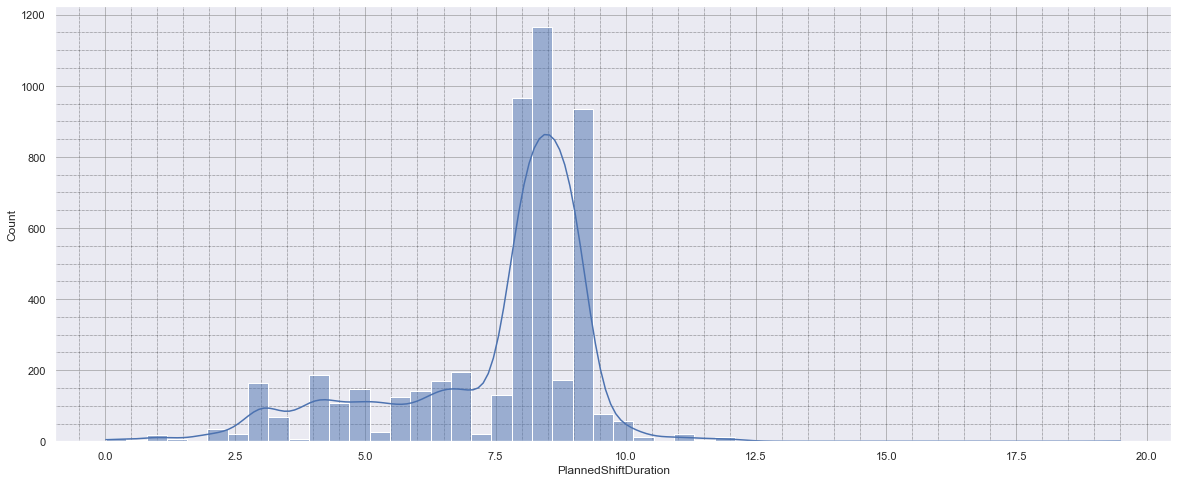

In [41]:
# plot the distibution for the planned shift duration
fig, ax = plt.subplots()
# swithc on minor TICKS
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

sns.histplot(x='PlannedShiftDuration', data=dfwt, bins=50, kde=True)

# Stats on extra attributes
Do again a summary on the statistical properties

In [42]:
list(dfwt.columns)

['repository_timestamp',
 'op',
 'dms_timestamp',
 'id',
 'shift_id',
 'start_date_time',
 'end_date_time',
 'realized_start_date_time',
 'realized_end_date_time',
 'decl_to_erp_system_date_time',
 'accept_by_employee_date_time',
 'pool_id',
 'deleted_date_time',
 'employee_id',
 'pool_employee_id',
 'confirmed_date_time',
 'viewable_for_emp_date_time',
 'called_up_date_time',
 'StartDTCopy',
 'PlannedShiftDuration',
 'RealizedShiftDuration',
 'StartDelta',
 'EndDelta',
 'DurationDelta']

### DurationDelta: over- or underperformance on planning

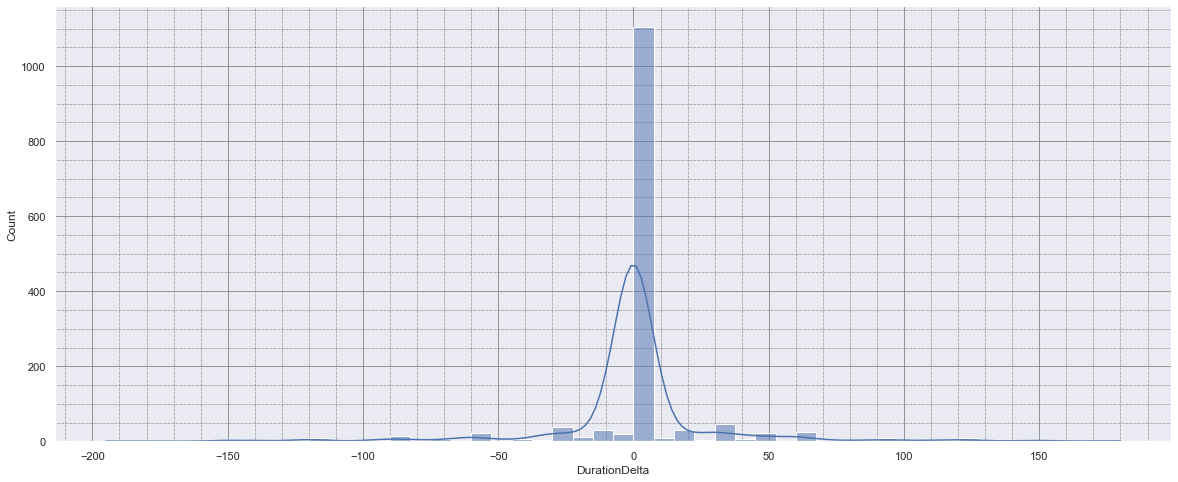

In [43]:
# copy the table, and sort
dfpc = dfwt

# drop NaNs
dfpc = dfpc[dfpc['DurationDelta'].notna()]

# pick value between a range
durdeltamin = -200
durdeltamax = 200
dfpc = dfpc[dfpc.DurationDelta.between(durdeltamin, durdeltamax)]

# sort
dfpc.sort_values('DurationDelta')

# plot the distibution for the planned shift duration
fig, ax = plt.subplots()
# swithc on minor TICKS
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.8', color='grey')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

sns.histplot(x='DurationDelta', data=dfpc, bins=50, kde=True)

Number of rows containing valid value:  3835


<ipython-input-44-7f0c3f1381e4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcal['CallStartDelta'] = dfcal['start_date_time'] - dfcal['called_up_date_time']
<ipython-input-44-7f0c3f1381e4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcal['CallStartDelta'] = dfcal['CallStartDelta'] / np.timedelta64(1, 'D')


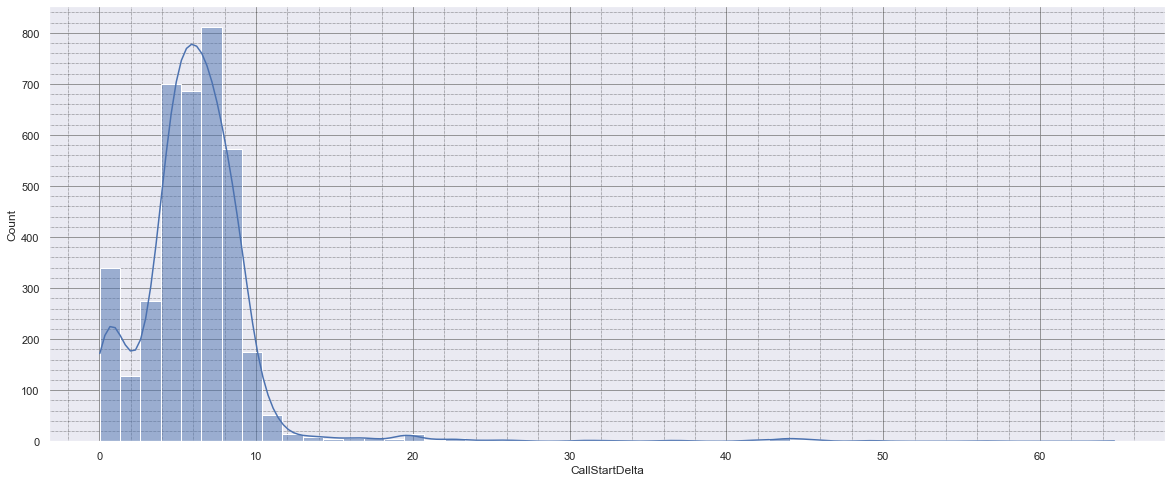

In [44]:
# what info has called_up_date_time
dfcal = dfwt

# drop NaNs
dfcal = dfcal[dfcal['called_up_date_time'].notna()]
print("Number of rows containing valid value: ", len(dfcal.index))

# check delta's
dfcal['CallStartDelta'] = dfcal['start_date_time'] - dfcal['called_up_date_time']
dfcal['CallStartDelta'] = dfcal['CallStartDelta'] / np.timedelta64(1, 'D')

# sort
dfcal.sort_values('CallStartDelta')
# plot the distibution for the planned shift duration
fig, ax = plt.subplots()
# swithc on minor TICKS
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.8', color='grey')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

sns.histplot(x='CallStartDelta', data=dfcal, bins=50, kde=True)

In [45]:
# take columns of interset, this omits too much output 
# - that are 6 till 12, names would be less prone to index shifts
# TODO

sum_cols = [
 'StartDTCopy',
 'PlannedShiftDuration',
 'RealizedShiftDuration',
 'StartDelta',
 'EndDelta']

dfsum = dfwt[sum_cols]

# calling describe method 
# desc = dfsum.describe(percentiles = perc, include = include)
desc = dfsum.describe(include = include)

# display
desc

,StartDTCopy,PlannedShiftDuration,RealizedShiftDuration,StartDelta,EndDelta
count,5000,5000.000000,1487.000000,1495.000000,1490.000000
unique,532,NaN,NaN,NaN,NaN
top,2020-02-13 07:00:00,NaN,NaN,NaN,NaN
freq,120,NaN,NaN,NaN,NaN
first,2020-02-09 01:30:00,NaN,NaN,NaN,NaN
last,2020-02-16 17:00:00,NaN,NaN,NaN,NaN
mean,NaN,7.502427,7.256108,-0.443478,0.863758
std,NaN,1.913169,2.143505,38.130746,64.942674
min,NaN,0.016667,1.000000,-739.000000,-1250.000000
25%,NaN,6.750000,6.000000,0.000000,0.000000


This summary uses the RealizedShiftDuration of 1487 shifts, of the 5000 PlannedShiftDuration. The missing ones are not filled in. On average a shift is planned for 7.5 hour, on average 7.25 hour is realized, with a sigma of 2.14 hour.
The StartDelta and EndDelta indicate that on average a shift is stared and ended almost perfect on time. The $\sigma_{StartDelta}=38$ min and $\sigma_{EndDelta}=65$ min.
It 

In [46]:
# aggregate deltas per pool
# dfdp = dfwt.groupby(by=['start_date_time'])
dfdp = dfwt.groupby(pd.Grouper(key='start_date_time', freq='1D'))
# dfdp = dfdp.groupby('pool_id')
dfdp.head(10)

,repository_timestamp,op,dms_timestamp,id,shift_id,start_date_time,end_date_time,realized_start_date_time,realized_end_date_time,decl_to_erp_system_date_time,accept_by_employee_date_time,pool_id,deleted_date_time,employee_id,pool_employee_id,confirmed_date_time,viewable_for_emp_date_time,called_up_date_time,StartDTCopy,PlannedShiftDuration,RealizedShiftDuration,StartDelta,EndDelta,DurationDelta
4170,2020-08-18 20:22:52.059095,I,2020-08-18 14:58:37.767276,125044502,130493914,2020-02-09 01:30:00,2020-02-09 21:00:00,NaT,NaT,NaT,NaT,121,NaT,807761,1115841,NaN,2019-12-30 00:43:07,NaT,2020-02-09 01:30:00,19.500000,NaN,NaN,NaN,NaN
1189,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:58.942877,126387667,130936578,2020-02-09 05:00:00,2020-02-09 05:01:00,NaT,NaT,NaT,2020-02-06 12:16:33,2509,NaT,734589,1021041,NaN,2020-02-05 14:39:48,2020-02-05 14:40:00,2020-02-09 05:00:00,0.016667,NaN,NaN,NaN,NaN
4432,2020-08-18 20:22:52.059095,I,2020-08-18 14:58:30.306552,125044193,130444214,2020-02-09 05:00:00,2020-02-09 15:00:00,NaT,NaT,NaT,NaT,121,NaT,415419,603151,NaN,2019-12-30 00:42:53,NaT,2020-02-09 05:00:00,10.000000,NaN,NaN,NaN,NaN
4593,2020-08-18 20:22:52.059095,I,2020-08-18 14:58:37.117251,125044433,130459670,2020-02-09 05:00:00,2020-02-09 15:00:00,NaT,NaT,NaT,NaT,121,NaT,151911,522611,NaN,2019-12-30 00:43:04,NaT,2020-02-09 05:00:00,10.000000,NaN,NaN,NaN,NaN
526,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:50.166973,126370747,131235327,2020-02-09 05:45:00,2020-02-09 13:45:00,2020-02-09 05:45:00,2020-02-09 13:45:00,2020-02-11 14:06:05,2020-02-06 10:03:16,20683,NaT,147346,1216355,NaN,NaT,2020-02-05 09:54:37,2020-02-09 05:45:00,8.000000,8.000000,0.0,0.0,0.0
1433,2020-08-18 20:22:52.059095,I,2020-08-18 14:44:01.411479,126031600,131462533,2020-02-09 06:00:00,2020-02-09 14:00:00,NaT,NaT,NaT,2020-02-08 12:59:55,15603,NaT,754925,1047519,NaN,2020-01-27 04:36:48,2020-02-05 13:41:29,2020-02-09 06:00:00,8.000000,NaN,NaN,NaN,NaN
2182,2020-08-18 20:22:52.059095,I,2020-08-18 14:44:16.947184,126398858,129874115,2020-02-09 06:00:00,2020-02-09 14:00:00,2020-02-09 06:00:00,2020-02-09 14:00:00,2020-02-17 10:52:51,2020-02-06 10:26:03,5439,NaT,889334,1221875,NaN,NaT,2020-02-06 09:31:51,2020-02-09 06:00:00,8.000000,8.000000,0.0,0.0,0.0
2362,2020-08-18 20:22:52.059095,I,2020-08-18 14:44:07.973489,126388112,131860848,2020-02-09 06:00:00,2020-02-09 14:30:00,NaT,NaT,NaT,2020-02-05 16:42:26,16963,NaT,643551,988700,NaN,NaT,2020-02-05 16:21:24,2020-02-09 06:00:00,8.500000,NaN,NaN,NaN,NaN
3091,2020-08-18 20:22:52.059095,I,2020-08-18 14:43:47.962888,126379451,131233941,2020-02-09 06:00:00,2020-02-09 15:00:00,NaT,NaT,NaT,NaT,19403,2020-02-06 09:49:44,878695,1207818,NaN,NaT,2020-02-05 14:42:56,2020-02-09 06:00:00,9.000000,NaN,NaN,NaN,NaN
4503,2020-08-18 20:22:52.059095,I,2020-08-18 14:44:08.397131,126377996,131971800,2020-02-09 06:00:00,2020-02-09 14:00:00,NaT,NaT,NaT,2020-02-06 18:19:44,11202,NaT,851770,1172838,NaN,NaT,2020-02-06 16:35:24,2020-02-09 06:00:00,8.000000,NaN,NaN,NaN,NaN


# Make it BIG
Let's take all this weeks data into account

_NOTE: THE FOLLOWING CELLs TAKE MINUTES PER CELL_

In [47]:
timea = time.time()
dfb = pd.read_csv(data_folder / "repo_iplan_employee_in_shift_20200210-20200216.csv", 
                       names=column_names, usecols=cols_of_interest, parse_dates=["repository_timestamp",
                "dms_timestamp",
                "start_date_time",
                "end_date_time",
                "realized_start_date_time",
                "realized_end_date_time",
                "decl_to_erp_system_date_time",
                "accept_by_employee_date_time",
                "viewable_for_emp_date_time",
                "deleted_date_time",
                "called_up_date_time"], skip_blank_lines=False)
timeb = time.time()
print("number of columns : ", len(dfb.columns))
print("number of rows    : ", len(dfb.index))
print("runntime          : ", timeb - timea)
# meanwhile limit the setsize, just in case
if set_size > len(dfb.index): 
    set_size = len(dfb.index)



number of columns :  18
number of rows    :  248119
runntime          :  3.2810397148132324


In [48]:
# high level stats on this data
ns = len(dfb.index)
print("Total number of shifts   : ", ns, "\n")
# number of pools
timea = time.time()
dfbpools = dfb.groupby(['pool_id']).nunique()
print("Number of unique pools   : ", len(dfbpools.index))
del dfbpools

dfbshifts = dfb.groupby(['shift_id']).nunique()
print("Number of unique shifts  : ", len(dfbshifts.index))
del dfbshifts

# number of deleted shifts
dfbshifts = dfb.dropna(subset=['deleted_date_time'])
print("Number of deleted shifts : ", len(dfb.index) - len(dfbshifts))

del dfbshifts

# number of (un)realized shifts
dfbrelshift = dfb.dropna(subset=['realized_start_date_time'])
print("Nr. of realized shifts   : ", len(dfbrelshift.index))
nunrel = len(dfb.index) - len(dfbrelshift.index)
print("Nr. of unrealized shifts : ", nunrel)
del dfbrelshift

# number of called up shifts
dfcalled = dfb.dropna(subset=['called_up_date_time'])
print("Nr. of called up shifts  : ", len(dfcalled.index))
del dfcalled

timeb = time.time()
dt =  timeb - timea
print("runtime: ", round(dt, 2))


Total number of shifts   :  248119 

Number of unique pools   :  472
Number of unique shifts  :  72017
Number of deleted shifts :  167967
Nr. of realized shifts   :  61219
Nr. of unrealized shifts :  186900
Nr. of called up shifts  :  168750
runtime:  3.26


In [49]:
167967 + 61219 + 186900

416086